In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

dataset = pd.read_csv("SaratogaHouses.csv")
dataset.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [63]:
x = dataset['price'].values
y1 = dataset['livingArea'].values
y2 = dataset['landValue'].values
y3 = dataset['landValue'].values
print(x[:5])
print(y1[:5])
print(y2[:5])
print(y3[:5])

[132500 181115 109000 155000  86060]
[ 906 1953 1944 1944  840]
[50000 22300  7300 18700 15000]
[50000 22300  7300 18700 15000]


In [82]:
reg = linear_model.LinearRegression()
reg.fit(dataset[['age','livingArea','bedrooms']],dataset.price)

LinearRegression()

In [87]:
m=reg.coef_
m

array([  -173.06774125,    122.65474233, -12660.19129229])

In [90]:
c=reg.intercept_
c

41478.737395315926

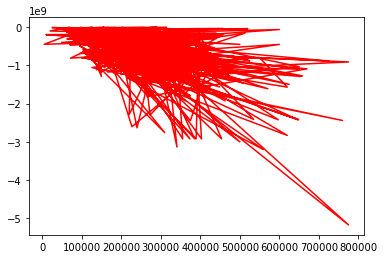

In [93]:
predic = []

for i in range(len(x)):
    y_pred= m[0]*y1[i] + m[1]*y2[i] + m[2]*y3[i] + c
    predic.append(y_pred)

#plt.scatter(x,y)
plt.plot(x,predic, color = 'red')

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
ds = pd.read_csv('SaratogaHouses.csv')
ds.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [28]:
la = ds['livingArea']
lv = ds['landValue']
r = ds['rooms']
ca = ds['centralAir']
price = ds['price']

In [30]:
encoder = LabelEncoder()
ca = encoder.fit_transform(ca)
ca

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
n = len(price)
x0 = np.ones(n)
x = np.array([x0, la, lv, r, ca]).T
y = np.array(price)
B = np.zeros(5)

[[1.000e+00 9.060e+02 5.000e+04 5.000e+00 0.000e+00]
 [1.000e+00 1.953e+03 2.230e+04 6.000e+00 0.000e+00]
 [1.000e+00 1.944e+03 7.300e+03 8.000e+00 0.000e+00]
 [1.000e+00 1.944e+03 1.870e+04 5.000e+00 0.000e+00]
 [1.000e+00 8.400e+02 1.500e+04 3.000e+00 1.000e+00]]


In [34]:
std = StandardScaler()
x = std.fit_transform(x)
x[:5]

array([[ 0.        , -1.36985441,  0.44108417, -0.88163155, -0.76221375],
       [ 0.        ,  0.31951971, -0.350095  , -0.44981202, -0.76221375],
       [ 0.        ,  0.30499787, -0.77853137,  0.41382706, -0.76221375],
       [ 0.        ,  0.30499787, -0.45291972, -0.88163155, -0.76221375],
       [ 0.        , -1.47634791, -0.5586007 , -1.74527063,  1.31196793]])

In [39]:
y = y.reshape(y.shape[0],1)
y = std.fit_transform(y)
y

array([[-0.80748259],
       [-0.31349249],
       [-1.04627242],
       ...,
       [-0.17341939],
       [-0.88369211],
       [-1.0229015 ]])

In [41]:
def cost_function(x,y,B):
    h = np.sum((x.dot(B) - y) ** 2 ) / (2*n)
    return h
cost_function(x,y,B)

864.0000000000001

In [56]:
def gradient_descent(X,y,B,epoch,alpha):
    cost_history = [0] * epoch
    
    for i in range(epoch):
        y_pred = X.dot(B)
        loss = y_pred - y
        gradient = X.T.dot(loss) / n
        B = B - alpha * gradient
        cost_history[i] = cost_function(X,y,B)
        
    return cost_history, B

cost, b = gradient_descent(x,y.flatten(),B,epoch=5000,alpha = 0.001)
print(cost[:5])
print(b[:5])

[0.4987632080692539, 0.49753164035908026, 0.49630527462041707, 0.49508408869914355, 0.49386806053567356]
[0.         0.45303928 0.33496539 0.09554414 0.10896487]


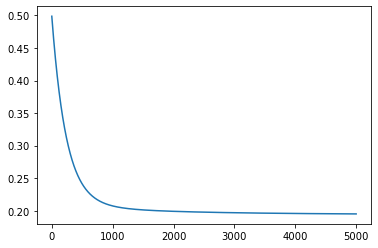

In [53]:
x1 = [i for i in range(5000)]
plt.plot(x1, cost)

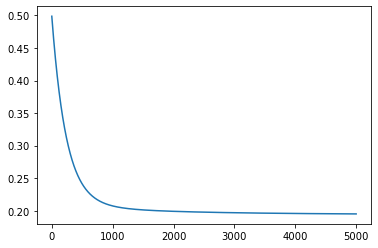

In [57]:
x1 = [i for i in range(5000)]
plt.plot(x1, cost)